## Install and Updated Required Libraries

In [4]:
### Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [6]:
### install joblib. This will be used to save your model. 
### Restart your kernel after installing 
# !pip install joblib

In [2]:
import pandas as pd
import numpy as np

## Read the CSV and Perform Basic Data Cleaning

In [15]:
df = pd.read_csv('../data/daily_summary.csv')
df = df.dropna(axis=0, how='all')
df = df.drop('index', axis=1)
print(df.shape)
df.head()

(991, 15)


,date,tweets,isRetweet,isDeleted,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive,negative,neutral,s&p_%change,s&p_up/down
0,2016-11-08,17,4,0,5.855472,915.44,0.099388,522435,1118266,908,12,0,4,0.004526,up
1,2016-11-09,3,1,0,5.599524,156.98,-0.156560,227982,700580,163,2,0,1,0.014872,up
2,2016-11-10,1,0,0,6.650000,39.90,0.893916,36535,142625,32,1,0,0,-0.000005,down
3,2016-11-11,5,0,0,5.826134,355.76,0.070050,193625,832596,351,4,0,1,0.000805,up
4,2016-11-15,2,0,0,5.873654,146.84,0.117570,69857,254719,144,2,0,0,0.005580,up


## Select Your Features and Label (X and y values)

In [30]:
# Set features. This will also be used as your x values.
# Select the features you would like to use - this is depended on the model you're going to use.
# It might be benefitial to utilize a feature selection model.
selected_features = df.drop(['date', 's&p_up/down', 's&p_%change'], axis=1)
print(selected_features.shape)
selected_features.head()

(991, 12)


,tweets,isRetweet,isDeleted,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive,negative,neutral
0,17,4,0,5.855472,915.44,0.099388,522435,1118266,908,12,0,4
1,3,1,0,5.599524,156.98,-0.156560,227982,700580,163,2,0,1
2,1,0,0,6.650000,39.90,0.893916,36535,142625,32,1,0,0
3,5,0,0,5.826134,355.76,0.070050,193625,832596,351,4,0,1
4,2,0,0,5.873654,146.84,0.117570,69857,254719,144,2,0,0


## Create Training And Test Split

In [31]:
# Pull out the output labels column or y values
labels = df['s&p_up/down']
print(labels.shape)
labels.head()

(991,)


0      up
1      up
2    down
3      up
4      up
Name: s&p_up/down, dtype: object

In [32]:
# Use the train_test_split method to categorize your data into training and testing groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, train_size=.7, random_state=3)

In [33]:
# Inspect training data
print(X_train.shape)
X_train.head()

(693, 12)


,tweets,isRetweet,isDeleted,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive,negative,neutral
698,15,0,0,5.536479,1581.47,-0.219605,256903,1176890,1666,6,1,8
224,13,5,1,5.830371,814.64,0.074287,169611,651491,822,10,0,3
14,4,0,0,5.794237,255.50,0.038153,32086,184796,259,4,0,0
170,5,1,0,5.377086,316.28,-0.378998,79147,313053,342,2,1,2
358,9,0,1,5.605780,1015.79,-0.150304,199486,848005,1056,7,0,2


In [34]:
y_train.shape

(693,)

## Pre-Processing

[0.09210526 0.         0.         0.36572666 0.18552672 0.36572666
 0.11816261 0.22600477 0.18644068 0.06741573 0.04166667 0.13559322]


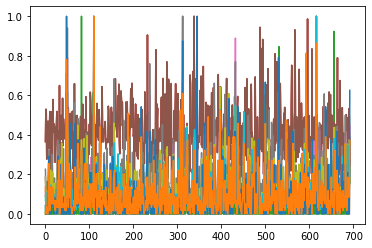

In [35]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# inspect the scaled data to see how the feature values have been scaled
print(X_train_scaled[0])

# Plot the scaled data
import matplotlib.pyplot as plt 
plt.plot(X_train_scaled)

## Train The Model

In [36]:
# Random Forest Classifier model for training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, bootstrap=True, max_depth=10, min_samples_split=8)
clf = clf.fit(X_train_scaled, y_train)

print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.8614718614718615
Testing Data Score: 0.5234899328859061
